# Intro

## Adding promotional code to AWS account

<img src="images/Billing & Credits.png">

You can add a promotional code to your AWS account by following these instructions:

Open the Credits page of the Billing and Cost Management console.
In the Promo Code box, type the promotional code.
In the box labeled Please type the characters as shown above, type the code.
Choose Redeem.
If the promotional code was typed correctly, is valid, hasn't expired, and hasn't been previously redeemed, it is added automatically to your AWS account.

## SageMaker Start Guide

### Sign in your AWS account, and type Amazon SageMaker

<img src="images/Go to SageMaker.png">

## Choose EU Dublin region

### Notebook instances

<img src="images/Notebook instances.png">

### Create notebook instance

<img src="images/Create notebook instance.png">

### Add instance name. You can keep ml.c5.2xlarge type for workshop purposes. 

<img src="images/Fill in info.png">

<img src="images/Fill in more info.png">

### Click on Create notebook instance

<img src="images/Open JupyterLab.png">

## Downloading the dataset

In [1]:
# Download bank data
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -o bank-additional.zip

--2020-01-25 13:40:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   672KB/s    in 0.6s    

2020-01-25 13:40:52 (672 KB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/.

## Read the data into Pandas data frame and split into train/validation/test samples

In [1]:
local_data_path = './bank-additional/bank-additional-full.csv'

import pandas as pd

data = pd.read_csv(local_data_path, sep=';')
pd.set_option('display.max_columns', 500)     # Make sure we can see all of the columns
pd.set_option('display.max_rows', 10)         # Keep the output on one page
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
# Convert yes/no into flag
data['y_flag'] = data['y'] == 'yes'

In [3]:
# Some class imbalance, but we can focus on feature importance for now
data['y_flag'].value_counts(dropna=False)

False    36548
True      4640
Name: y_flag, dtype: int64

In [4]:
# 80%/10%/10% training-validation-test split

train_data = data.sample(frac=0.8,random_state=2020)

valid_data = data.drop(train_data.index)
valid_data = valid_data.sample(frac=0.5, random_state=2020)

test_data = data.drop(train_data.index.tolist() + valid_data.index.tolist())

In [5]:
print(train_data.shape, valid_data.shape, test_data.shape)

(32950, 22) (4119, 22) (4119, 22)


## Data

We have a little over 40K customer records, 20 features plus a target variable ('y') for each customer <br>

The features are mixed; some numeric, some categorical. The data appears to be sorted, at least by time and contact, maybe more

__Specifics on each of the features:__

_Demographics_ : <br>
- <font color=blue>age</font>: Customer's age (numeric)<br>
- <font color=blue>job</font>: Type of job (categorical: 'admin.', 'services', ...)<br>
- <font color=blue>marital</font>: Marital status (categorical: 'married', 'single', ...)<br>
- <font color=blue>education</font>: Level of education (categorical: 'basic.4y', 'high.school', ...)<br>

_Past customer events_ :<br>
- <font color=blue>default</font>: Has credit in default? (categorical: 'no', 'unknown', ...)<br>
- <font color=blue>housing</font>: Has housing loan? (categorical: 'no', 'yes', ...)<br>
- <font color=blue>loan</font>: Has personal loan? (categorical: 'no', 'yes', ...)<br>

_Past direct marketing contacts_ :<br>
- <font color=blue>contact</font>: Contact communication type (categorical: 'cellular', 'telephone', ...)<br>
- <font color=blue>month</font>: Last contact month of year (categorical: 'may', 'nov', ...)<br>
- <font color=blue>day_of_week</font>: Last contact day of the week (categorical: 'mon', 'fri', ...)<br>
- <font color=blue>duration</font>: Last contact duration, in seconds (numeric). Important note: If duration = 0 then y = 'no'.<br>

_Campaign information_ :<br>
- <font color=blue>campaign</font>: Number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
- <font color=blue>pdays</font>: Number of days that passed by after the client was last contacted from a previous campaign (numeric)<br>
- <font color=blue>previous</font>: Number of contacts performed before this campaign and for this client (numeric)<br>
- <font color=blue>poutcome</font>: Outcome of the previous marketing campaign (categorical: 'nonexistent','success', ...)<br>

_External environment factors_ :<br>

- <font color=blue>emp.var.rate</font>: Employment variation rate - quarterly indicator (numeric)<br>
- <font color=blue>cons.price.idx</font>: Consumer price index - monthly indicator (numeric)<br>
- <font color=blue>cons.conf.idx</font>: Consumer confidence index - monthly indicator (numeric)<br>
- <font color=blue>euribor3m</font>: Euribor 3 month rate - daily indicator (numeric)<br>
- <font color=blue>nr.employed</font>: Number of employees - quarterly indicator (numeric)<br>

_Target variable_ :<br>
- <font color=blue>y</font>: Has the client subscribed a term deposit? (binary: 'yes','no')<br>

# Agenda

_Build a number of models (LR, RF, MLP with sklearn, NN with PyTorch) to_ :<br>

- <font color=blue>Explain better</font>: Understand how our models make predictions<br>
- <font color=blue>Guide better</font>: Understand how to use our models in the right way<br>
- <font color=blue>Mindful</font>: Be mindful of model bias<br>



## Pre-processing training data

__Pre-processing Pipeline__ : <br>
- <font color=blue>Feature types</font>: Identifying numerical and categorical features <br>
- <font color=blue> One-hot encoding</font>: Converting categorical variables to dummies <br>
- <font color=blue>Scaling</font>: We choose Robust Scaling here: $\frac{X-median(X)}{IQR(X)}$<br>
- <font color=blue>Feature selection</font>: We don't use it here. <br>



In [6]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_flag
28239,44,blue-collar,married,basic.9y,no,no,no,cellular,apr,tue,1,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no,False
10515,46,housemaid,married,basic.4y,unknown,no,yes,telephone,jun,tue,166,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,False
36540,36,management,single,university.degree,no,yes,no,cellular,jun,wed,300,2,3,1,success,-2.9,92.963,-40.8,1.260,5076.2,yes,True
2159,48,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,262,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
9168,41,blue-collar,married,high.school,unknown,no,yes,telephone,jun,fri,320,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,False


In [7]:
# Try to impose float, if not, the column is identified as categorical (not perfect, but quick hack)
numerical_cols = []
categorical_cols = []
exclude_one = []
for i in train_data.columns:
    if i != 'y' and i != 'y_flag':
        try:
            col = train_data[i].astype('float')
            numerical_cols.append(i)
        except:
            categorical_cols.append(i)
            exclude_one.append('%s_ohe_%s' % (i, train_data[i].value_counts().reset_index().tail(1)['index'].values[0]))

In [8]:
import tools
from sklearn.preprocessing import RobustScaler

In [9]:
ohe = tools.CategoricalEncoder(categorical_cols)

In [10]:
target_var = 'y_flag'

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif, f_regression


from sklearn.preprocessing import StandardScaler, RobustScaler, Imputer

# scikit-learn Pipeline learning transformations on the training data

pipe = Pipeline([('ohe', tools.CategoricalEncoder(categorical_cols)),
                 ('imputer', Imputer(strategy="median")),
                 ('scaler', RobustScaler()),
                 ('f_selection', SelectKBest(score_func=f_classif, k='all'))])


print('Fitting pipeline: \n')
Xt = pipe.fit_transform(train_data[[i for i in train_data.columns if i != 'y' and i != 'y_flag']], train_data[target_var])

Xt = tools.get_df_from_pipe(pipe, Xt)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Fitting pipeline: 

Before one-hot-encoding: (32950, 20)
After one-hot-encoding: (32950, 73)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5  9 13 23 29 38 46 52 62 69] are constant.
  UserWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [12]:
# Append target variable, transformed data and any other variable to carry through to model build

df_preprocessed = tools.combine(Xt, train_data[target_var], train_data[[]])

In [13]:
df_preprocessed.shape

(32950, 74)

In [14]:
train_data_ohe = df_preprocessed[[target_var] + numerical_cols + pipe.named_steps['ohe'].ohe_columns_]

In [15]:
target_var = 'y_flag'
features = [i for i in train_data_ohe.columns if i != 'y' and i != 'y_flag' and '_nan' not in i and i not in exclude_one]

## Applying the learnt pre-processing steps to validation/test samples

In [16]:
# Validation data transformation

Xt_valid = pipe.fit_transform(valid_data[[i for i in train_data.columns if i != 'y' and i != 'y_flag']], valid_data[target_var])

Xt_valid = tools.get_df_from_pipe(pipe, Xt_valid)

df_valid_preprocessed = tools.combine(Xt_valid, valid_data[target_var], valid_data[[]])

valid_data_ohe = df_valid_preprocessed[[target_var] + numerical_cols + pipe.named_steps['ohe'].ohe_columns_]

Before one-hot-encoding: (4119, 20)
After one-hot-encoding: (4119, 72)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5  9 13 22 28 37 45 51 61 68] are constant.
  UserWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [17]:
# Test data transformation

Xt_test = pipe.fit_transform(test_data[[i for i in train_data.columns if i != 'y' and i != 'y_flag']], test_data[target_var])

Xt_test = tools.get_df_from_pipe(pipe, Xt_test)

df_test_preprocessed = tools.combine(Xt_test, test_data[target_var], test_data[[]])

test_data_ohe = df_test_preprocessed[[target_var] + numerical_cols + pipe.named_steps['ohe'].ohe_columns_]

Before one-hot-encoding: (4119, 20)
After one-hot-encoding: (4119, 71)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5  9 13 21 27 36 44 50 60 67] are constant.
  UserWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


### Logistic Regression as baseline

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression(random_state=2020)
lr.fit(train_data_ohe[features], train_data_ohe[target_var])

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2020, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
# ROC AUC score is between 0 and 1, and evaluates the model performance on its ability to separate classes.

roc_auc_score(train_data_ohe[target_var], lr.predict_proba(train_data_ohe[features])[:, 1])

0.9363600117119549

In [22]:
roc_auc_score(valid_data_ohe[target_var], lr.predict_proba(valid_data_ohe[features])[:, 1])

0.9408400449870569

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(valid_data_ohe[target_var], lr.predict(valid_data_ohe[features])))
print(classification_report(valid_data_ohe[target_var], lr.predict(valid_data_ohe[features])))
print(accuracy_score(valid_data_ohe[target_var], lr.predict(valid_data_ohe[features])))

[[3507  140]
 [ 215  257]]
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      3647
        True       0.65      0.54      0.59       472

   micro avg       0.91      0.91      0.91      4119
   macro avg       0.79      0.75      0.77      4119
weighted avg       0.91      0.91      0.91      4119

0.913814032532168


In [24]:
# Logistic coefficients: odds ratios

lr_coef = pd.DataFrame(features, lr.coef_[0]).reset_index().rename(columns={'index': 'coef', 0: 'variable'})[['variable', 'coef']].assign(abs_coef=lambda x: abs(x['coef'])).sort_values(by='abs_coef')

In [25]:
lr_coef['model'] = 'Logistic Regression'

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import numpy as np

In [27]:
def plot_coefs(df_coef):
    """
    Plot coefficients/feature importances of a model
    """
    marker_list = 's'
    width=0.25
    base_x = pd.np.arange(len(df_coef)) - 0.2
    fig, ax = plt.subplots(figsize=(8, 5))

    for i, mod in enumerate(df_coef.model.unique()):
        mod_df = df_coef[df_coef.model == mod]
        mod_df = mod_df.set_index('variable').reindex(df_coef['variable'].unique())

        X = base_x + width*i
        ax.bar(X, mod_df['coef'],  
               color='none')

        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.scatter(x=X, 
                   marker=marker_list[i], s=10, 
                   y=mod_df['coef'], color='black')
        ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
        ax.xaxis.set_ticks_position('none')
        ax.set_xticks(np.arange(len(df_coef)))
        _ = ax.set_xticklabels(df_coef['variable'].tolist(), 
                               rotation=90, fontsize=8)

    legend_elements = [Line2D([0], [0], marker=m,
                              label='Model: %s' % (df_coef.model.unique()[0]),
                              color = 'k',
                              markersize=5)
                       for i, m in enumerate(marker_list)
                      ]

    _ = ax.legend(handles=legend_elements, loc=2, 
                  prop={'size': 10}, labelspacing=1.2)

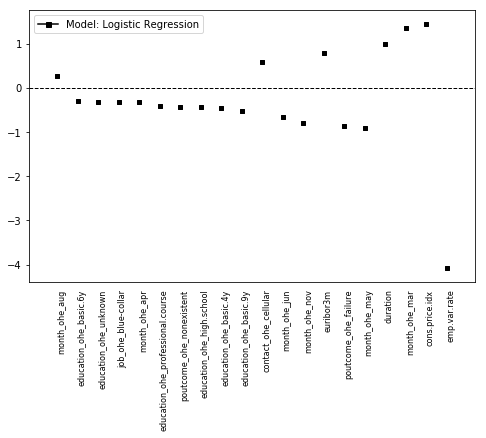

In [28]:
plot_coefs(lr_coef.tail(20))

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [33]:
rf = RandomForestClassifier(random_state=2020, verbose=1)
rf.fit(train_data_ohe[features], train_data_ohe[target_var])

/Users/edelger/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=1, warm_start=False)

In [34]:
roc_auc_score(train_data_ohe[target_var], rf.predict_proba(train_data_ohe[features])[:, 1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.9998115707224093

In [35]:
roc_auc_score(valid_data_ohe[target_var], rf.predict_proba(valid_data_ohe[features])[:, 1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9203666933118932

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(valid_data_ohe[target_var], rf.predict(valid_data_ohe[features])))
print(classification_report(valid_data_ohe[target_var], rf.predict(valid_data_ohe[features])))
print(accuracy_score(valid_data_ohe[target_var], rf.predict(valid_data_ohe[features])))

[[3553   94]
 [ 256  216]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      3647
        True       0.70      0.46      0.55       472

    accuracy                           0.92      4119
   macro avg       0.81      0.72      0.75      4119
weighted avg       0.91      0.92      0.91      4119

0.9150279193979121


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [37]:
# Random Forest coefficients: extent of contribution to lower impurity/information gain.
rf_coef = pd.DataFrame(features, columns=['variable'])
rf_coef['coef'] = rf.feature_importances_
rf_coef['model'] = 'Random Forest'
rf_coef = rf_coef.sort_values(by='coef')

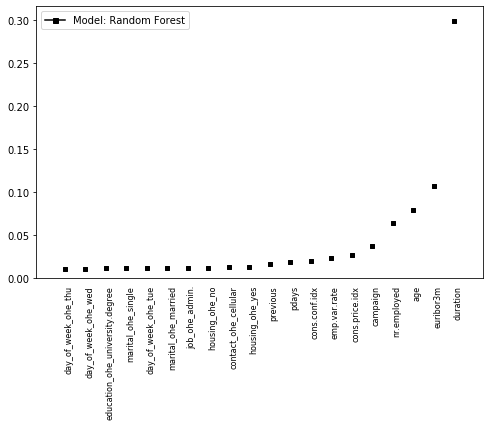

In [38]:
plot_coefs(rf_coef.tail(20))

### Multi-Layered Perceptron

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
mlp_params = {'alpha': [0.0001], 'learning_rate': ['constant'], 
              'hidden_layer_sizes': [(10, ), (5, )]}

In [32]:
mlp = MLPClassifier(random_state=2020, verbose=1, batch_size=64)

In [33]:
# Grid Search: simple here as we are just choosing the size of the hidden layer either 10 or 5. 
# Based on 5 cross-validation sets, we choose the best estimator
clf = GridSearchCV(mlp, mlp_params, cv=5)

In [34]:
clf.fit(train_data_ohe[features], train_data_ohe[target_var])

Iteration 1, loss = 0.33524191
Iteration 2, loss = 0.20992484
Iteration 3, loss = 0.19898418
Iteration 4, loss = 0.19530781
Iteration 5, loss = 0.18878739
Iteration 6, loss = 0.18910263
Iteration 7, loss = 0.18720668
Iteration 8, loss = 0.18824128
Iteration 9, loss = 0.18659406
Iteration 10, loss = 0.18415925
Iteration 11, loss = 0.18448517
Iteration 12, loss = 0.18332117
Iteration 13, loss = 0.18314926
Iteration 14, loss = 0.18372692
Iteration 15, loss = 0.18247245
Iteration 16, loss = 0.18318059
Iteration 17, loss = 0.18002959
Iteration 18, loss = 0.18365831
Iteration 19, loss = 0.18109535
Iteration 20, loss = 0.17981410
Iteration 21, loss = 0.18044278
Iteration 22, loss = 0.18151153
Iteration 23, loss = 0.18114557
Iteration 24, loss = 0.18253179
Iteration 25, loss = 0.17825786
Iteration 26, loss = 0.17830618
Iteration 27, loss = 0.17869330
Iteration 28, loss = 0.17756989
Iteration 29, loss = 0.17926257
Iteration 30, loss = 0.17915131
Iteration 31, loss = 0.17891792
Iteration 32, los

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2020, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001], 'learning_rate': ['constant'], 'hidden_layer_sizes': [(10,), (5,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
clf.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant'}

In [37]:
train_data_ohe

,y_flag,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_ohe_admin.,job_ohe_blue-collar,job_ohe_entrepreneur,job_ohe_housemaid,job_ohe_management,job_ohe_retired,job_ohe_self-employed,job_ohe_services,job_ohe_student,job_ohe_technician,job_ohe_unemployed,job_ohe_unknown,job_ohe_nan,marital_ohe_divorced,marital_ohe_married,marital_ohe_single,marital_ohe_unknown,marital_ohe_nan,education_ohe_basic.4y,education_ohe_basic.6y,education_ohe_basic.9y,education_ohe_high.school,education_ohe_illiterate,education_ohe_professional.course,education_ohe_university.degree,education_ohe_unknown,education_ohe_nan,default_ohe_no,default_ohe_unknown,default_ohe_yes,default_ohe_nan,housing_ohe_no,housing_ohe_unknown,housing_ohe_yes,housing_ohe_nan,loan_ohe_no,loan_ohe_unknown,loan_ohe_yes,loan_ohe_nan,contact_ohe_cellular,contact_ohe_telephone,contact_ohe_nan,month_ohe_apr,month_ohe_aug,month_ohe_dec,month_ohe_jul,month_ohe_jun,month_ohe_mar,month_ohe_may,month_ohe_nov,month_ohe_oct,month_ohe_sep,month_ohe_nan,day_of_week_ohe_fri,day_of_week_ohe_mon,day_of_week_ohe_thu,day_of_week_ohe_tue,day_of_week_ohe_wed,day_of_week_ohe_nan,poutcome_ohe_failure,poutcome_ohe_nonexistent,poutcome_ohe_success,poutcome_ohe_nan
0,False,0.400000,-0.828704,-0.5,0.0,0.0,-0.90625,-0.733406,-0.841270,-0.941111,-0.712403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,0.533333,-0.064815,-0.5,0.0,0.0,0.09375,0.779108,0.000000,0.028753,0.287597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,-0.133333,0.555556,0.0,-996.0,1.0,-1.25000,-0.855277,0.158730,-0.994471,-0.889922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0
3,False,0.666667,0.379630,0.0,0.0,0.0,0.00000,0.266594,0.857143,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,0.200000,0.648148,-0.5,0.0,0.0,0.09375,0.779108,0.000000,0.030412,0.287597,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,False,0.333333,-0.046296,0.0,0.0,0.0,-0.37500,-0.597388,-0.031746,-0.184130,0.037209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32946,False,0.733333,0.231481,-0.5,0.0,0.0,0.09375,-0.331882,0.904762,0.031241,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32947,False,-0.533333,1.430556,-0.5,0.0,0.0,0.09

In [46]:
roc_auc_score(train_data_ohe[target_var], clf.best_estimator_.predict_proba(train_data_ohe[features])[:, 1])

0.9447878976467009

In [47]:
roc_auc_score(valid_data_ohe[target_var], clf.best_estimator_.predict_proba(valid_data_ohe[features])[:, 1])

0.9468654292127728

In [48]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=64, beta_1=0.9, beta_2=0.999,
                                     early_stopping=False, epsilon=1e-08,
                                     hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=2020, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=1,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001], 'hidden_layer_sizes': [(5,)],


## LIME

__Heterogeneous attribution__: Given an example input, perturb the inputs, get the model predictions and train with a "local surrogate model" which is a more interpretable model on the perturbed training dataset. Surrogate models are trained to approximate the predictions of the underlying black box model. Instead of training a global surrogate model, LIME trains local surrogate models to explain individual predictions. Explain the prediction by interpreting the "local surrogate model". <br>

__Based on paper__: "Why Should I Trust You?": Explaining the Predictions of Any Classifier (https://arxiv.org/abs/1602.04938)


In [13]:
!pip install lime

    100% |████████████████████████████████| 276kB 24.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for lime ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Running setup.py bdist_wheel for progressbar ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
from lime.lime_tabular import LimeTabularExplainer

__Interpretation of an example (below)__: On the left we can see how the model classified example data; the model attached 100% probability to the first instance in the test set to not subscribe to deposit. The middle column of the explainer demonstrates the core of the LIME explainer and breaks down the predicted probability into contributions for each predictor. Here we choose top 5 features. 

In [15]:
# fit an explainer with training data example

explainer = LimeTabularExplainer(
    train_data_ohe[features].values, feature_names=features, 
    categorical_features=[ind for ind, i in enumerate(features) if '_ohe_' in i.lower()])

# Train a interpretable model. By default LIME uses the ridge regression. Typically sparse models. 
expl = explainer.explain_instance(
    test_data_ohe[features].iloc[0], predict_fn=clf.best_estimator_.predict_proba, num_features=5, top_labels=1)

# visualize the result
expl.show_in_notebook(show_table=True)

NameError: name 'train_data_ohe' is not defined

### Neural Net

In [16]:
# Import pytorch library

import torch
from torch import nn, optim, as_tensor
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

ModuleNotFoundError: No module named 'torch'

In [52]:
# Parameters for our network

input_size = 53
hidden_sizes = [5]
output_size = 1

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), # multiply input with weights and add bias term
                      nn.ReLU(), # relu activation function applied
                      nn.BatchNorm1d(hidden_sizes[0]), # batch norm
                      nn.Dropout(0.1), # dropout
                      nn.Linear(hidden_sizes[0], output_size), # multiple hidden state output by weight and add bias term
                     )
print(model)

Sequential(
  (0): Linear(in_features=53, out_features=5, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=5, out_features=1, bias=True)
)


In [53]:
# # Alternatively set a name with the layer
# from collections import OrderedDict
# model = nn.Sequential(OrderedDict([
#                       ('fc1', nn.Linear(input_size, hidden_sizes[0])),
#                       ('relu1', nn.ReLU()),
#                         ('bn1', nn.BatchNorm1d(hidden_sizes[0])),
#                         ('drop1', nn.Dropout(0.1)),
#                       ('output', nn.Linear(hidden_sizes[0], output_size)),
# ]))

# model

Sequential(
  (fc1): Linear(in_features=53, out_features=5, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.1, inplace=False)
  (output): Linear(in_features=5, out_features=1, bias=True)
)

In [54]:
# From pandas dataframe to numpy
tr_features_ = np.stack([c.values for n,c in train_data_ohe[features].items()], 1).astype(np.float32)
tr_y_ = np.array([1 if i else 0 for i in train_data_ohe[target_var].values])

valid_features_ = np.stack([c.values for n,c in valid_data_ohe[features].items()], 1).astype(np.float32)
valid_y_ = np.array([1 if i else 0 for i in valid_data_ohe[target_var].values])

test_features_ = np.stack([c.values for n,c in test_data_ohe[features].items()], 1).astype(np.float32)
test_y_ = np.array([1 if i else 0 for i in test_data_ohe[target_var].values])

In [55]:
# From numpy to tensor

tr_features_ = torch.tensor(tr_features_, dtype=torch.float)
tr_y_ = torch.tensor(tr_y_)

valid_features_ = torch.tensor(valid_features_, dtype=torch.float)
valid_y_ = torch.tensor(valid_y_)

test_features_ = torch.tensor(test_features_, dtype=torch.float)
test_y_ = torch.tensor(test_y_)

In [56]:
# DataLoader for batch

train_ = data_utils.TensorDataset(tr_features_, tr_y_)
train_dl = data_utils.DataLoader(train_, batch_size=64, shuffle=True)

valid_ = data_utils.TensorDataset(valid_features_, valid_y_)
valid_dl = data_utils.DataLoader(valid_, batch_size=64, shuffle=True)

test_ = data_utils.TensorDataset(test_features_, test_y_)
test_dl = data_utils.DataLoader(test_, batch_size=len(test_features_), shuffle=False)

In [57]:
len(train_dl)

515

In [58]:
# Define the loss
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


# Optimizers require the parameters to optimize and a learning rate
epochs = 100
for e in range(epochs):
    running_loss = 0
    for i, data in enumerate(train_dl, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        output = model(inputs)
        # Change labels shape and type for BCEWithLogitsLoss loss function
        
        labels = torch.unsqueeze(labels, 1).type(torch.float32)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    else:
        # print statistics
        print(f"Training loss: {running_loss/len(train_dl)}")


Training loss: 0.7188127018872974
Training loss: 0.641637612546532
Training loss: 0.5744649050305191
Training loss: 0.5187789940139622
Training loss: 0.4662337231983259
Training loss: 0.4184278485844436
Training loss: 0.3765962184632866
Training loss: 0.33939990762946676
Training loss: 0.3090844993163081
Training loss: 0.2837207970109958
Training loss: 0.2642988743423258
Training loss: 0.24930349889310818
Training loss: 0.23912473364362438
Training loss: 0.23003177813534598
Training loss: 0.22351373998285498
Training loss: 0.21830821511814896
Training loss: 0.21467314230874904
Training loss: 0.21262983299285462
Training loss: 0.21140287482333414
Training loss: 0.20946790367654225
Training loss: 0.20693595649547947
Training loss: 0.20744564173001687
Training loss: 0.2056393823143348
Training loss: 0.20642011078816017
Training loss: 0.20408305395575402
Training loss: 0.2041560414491348
Training loss: 0.20339716895691398
Training loss: 0.2022782460578437
Training loss: 0.20175520994709534

In [59]:
# Evaluate performance on validation data
valid__ = data_utils.TensorDataset(valid_features_, valid_y_)
valid_dl_ = data_utils.DataLoader(valid__, batch_size=len(test_features_), shuffle=False)

dataiter = iter(valid_dl_)
datapoint, labels = dataiter.next()

In [60]:
datapoint.shape

torch.Size([4119, 53])

In [61]:
outputs = model(datapoint)

In [62]:
np.quantile([i[0] for i in outputs.detach().numpy()], [i/10 for i in range(0, 11)])

array([-9.6803503 , -7.46736059, -6.72038612, -6.07038183, -5.41274643,
       -4.70403147, -3.87540827, -2.7115519 , -1.31063762, -0.0364455 ,
        2.02774048])

In [64]:
roc_auc_score(valid_data_ohe[target_var], outputs.detach().numpy())

0.9363997225488329

## SHAP

(SHapley Additive exPlanation) leverages the idea of game-theoretic concept based on paper by Shapley "A Value for n-Person Games" (https://www.rand.org/content/dam/rand/pubs/research_memoranda/2008/RM670.pdf). Shapley values model feature influence scores. The technical definition of a Shapley value is the “average marginal contribution of a feature value over all possible coalitions.” In other words, Shapley values consider all possible predictions for an instance using all possible combinations of inputs. Because of this exhaustive approach, SHAP can guarantee properties like consistency and local accuracy, but can be slow. 

__Based on paper__: A Unified Approach to Interpreting Model Predictions(https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf)

__Basic idea__: Decomposing conditional expectation $\hat f_i = E(\hat f_i) + \sum_{f=1}^{p} \alpha_{ij}$, where $\alpha_{ij}$ is how feature j affects sample data point i. You can use SHAP for linear, tree-based, deep learning and generally any model of your choice. It's model agnostic. However, it is computationally intensive, so there are important approximations and optimizations which are used for different models to keep the nice properties intact.

In [65]:
# import lime
# import lime.lime_tabular
import shap

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
model

Sequential(
  (fc1): Linear(in_features=53, out_features=5, bias=True)
  (relu1): ReLU()
  (bn1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.1, inplace=False)
  (output): Linear(in_features=5, out_features=1, bias=True)
)

In [67]:
# Take test data
batch = next(iter(test_dl))
test_dp, label_dp = batch
print(test_dp.shape)

torch.Size([4119, 53])


In [68]:
# The background dataset to use for integrating out features.
background = test_dp[:100]

In [69]:
n_test_datapoints = 10
test_datapoints = test_dp[100:100+n_test_datapoints]

In [70]:
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_datapoints)

In [71]:
shap.initjs()

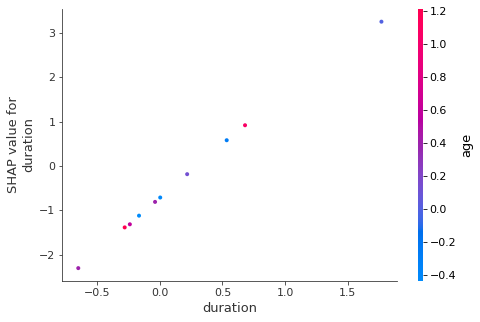

In [72]:
shap.dependence_plot('duration', shap_values, test_datapoints.numpy(), feature_names=features)

In [73]:
shap.force_plot(e.expected_value, shap_values, feature_names=features)

In [74]:
row = 5

print(shap_values[row].sum()+e.expected_value)
shap.force_plot(
    base_value=e.expected_value,
    shap_values=shap_values[row],
    features=test_datapoints.numpy()[row],
    feature_names=features,
    link="identity",
    out_names="Subscribed",
)
 

[-2.6768038]


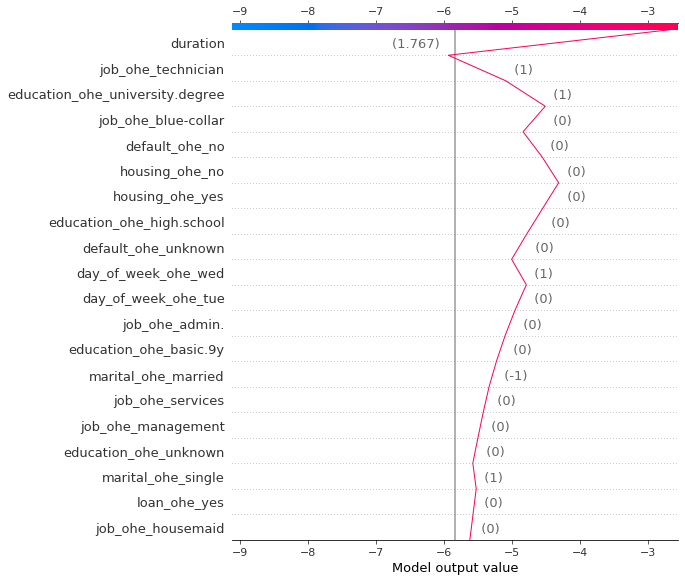

In [75]:
shap.decision_plot(
    base_value=e.expected_value,
    shap_values=shap_values[row],
    features=test_datapoints.numpy()[row],
    feature_names=features,
    link="identity",
)

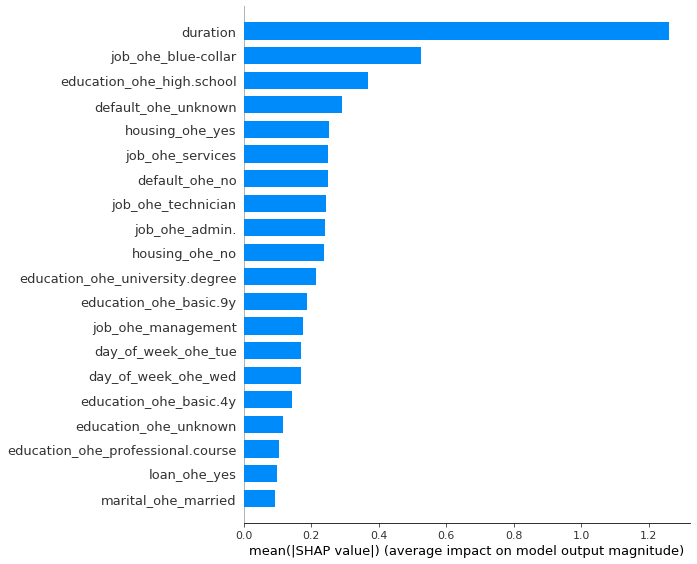

In [76]:
shap.summary_plot(shap_values = shap_values, features = test_datapoints.numpy(), max_display=20, plot_type='bar', feature_names=features)


In [77]:
nn_coef = pd.DataFrame(e.attributions(test_datapoints), columns=features).abs().mean(axis=0).reset_index().rename(columns={'index': 'variable', 0: 'coef'}).sort_values(by='coef')

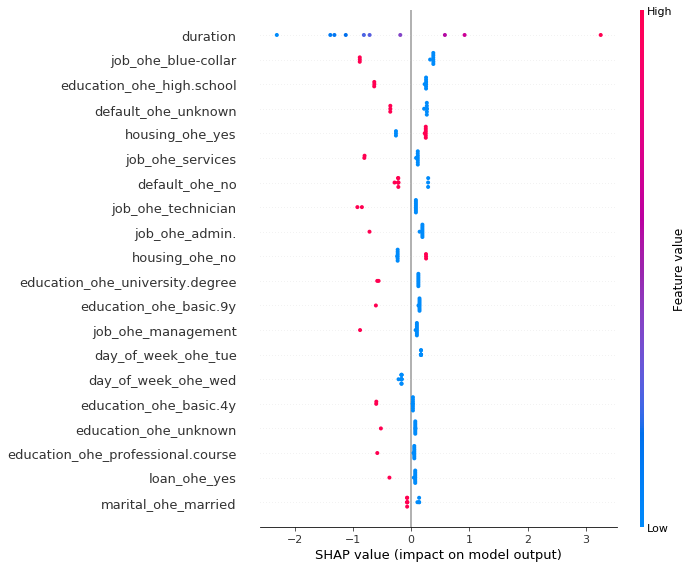

In [78]:
shap.summary_plot(shap_values = shap_values, features = test_datapoints.numpy(), max_display=20, feature_names=features)


## Robust variable importance measure

In [84]:
from tools import *

In [85]:
lr_coef_ = lr_coef.sort_values(by='abs_coef', ascending=False)
lr_coef_['predicted_rank_lr'] = lr_coef['abs_coef'].rank(ascending=False)
lr_coef_ = lr_coef_[['variable', 'predicted_rank_lr']]

In [86]:
rf_coef_ = rf_coef.sort_values(by='coef', ascending=False)
rf_coef_['predicted_rank_rf'] = rf_coef['coef'].rank(ascending=False)
rf_coef_ = rf_coef_[['variable', 'predicted_rank_rf']]

In [87]:
nn_coef_ = nn_coef.sort_values(by='coef', ascending=False)
nn_coef_['predicted_rank_nn'] = nn_coef_['coef'].rank(ascending=False)
nn_coef_ = nn_coef_[['variable', 'predicted_rank_nn']]

In [90]:
lr_test = LogisticRegression(random_state=2020)
lr_test.fit(valid_data_ohe[features], valid_data_ohe[target_var])
lr_coef_test = pd.DataFrame(features, lr_test.coef_[0]).reset_index().rename(columns={'index': 'coef', 0: 'variable'})[['variable', 'coef']]. \
assign(abs_coef=lambda x: abs(x['coef'])).sort_values(by='abs_coef')
lr_coef_test['model'] = 'Logistic Regression'

rf_test = RandomForestClassifier(random_state=2020, verbose=1)
rf_test.fit(valid_data_ohe[features], valid_data_ohe[target_var])

rf_coef_test = pd.DataFrame(features, columns=['variable'])
rf_coef_test['coef'] = rf_test.feature_importances_
rf_coef_test['model'] = 'Random Forest'
rf_coef_test = rf_coef_test.sort_values(by='coef')



Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [91]:
lr_coef_test_ = lr_coef_test.sort_values(by='abs_coef', ascending=False)
lr_coef_test_['predicted_rank_lr'] = lr_coef_test_['abs_coef'].rank(ascending=False)
lr_coef_test_ = lr_coef_test_[['variable', 'predicted_rank_lr']]

rf_coef_test_ = rf_coef_test.sort_values(by='coef', ascending=False)
rf_coef_test_['predicted_rank_rf'] = rf_coef_test_['coef'].rank(ascending=False)
rf_coef_test_ = rf_coef_test_[['variable', 'predicted_rank_rf']]

In [92]:
LR_coef = pd.merge(lr_coef_, lr_coef_test_, how='left', on='variable')
RF_coef = pd.merge(rf_coef_, rf_coef_, how='left', on='variable')

In [93]:
find_rankdcg(LR_coef['predicted_rank_lr_x'], LR_coef['predicted_rank_lr_y'])

0.8574875234279549

In [94]:
find_rankdcg(RF_coef['predicted_rank_rf_x'], RF_coef['predicted_rank_rf_y'])

1.0

In [95]:
# Hyperparameters for our network
input_size = 53
hidden_sizes = [5]
output_size = 1
# Build a feed-forward network
model_test = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.BatchNorm1d(hidden_sizes[0]),
                      nn.Dropout(0.1),
                      nn.Linear(hidden_sizes[0], output_size), 
                     )
print(model_test)


# Define the loss
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_test.parameters(), lr=0.0001)


# Optimizers require the parameters to optimize and a learning rate
epochs = 200
for e in range(epochs):
    running_loss = 0
    for i, data in enumerate(valid_dl, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        output = model_test(inputs)
        # Change labels shape and type for BCEWithLogitsLoss loss function
        
        labels = torch.unsqueeze(labels, 1).type(torch.float32)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    else:
        # print statistics
        print(f"Training loss: {running_loss/len(valid_dl)}")




Sequential(
  (0): Linear(in_features=53, out_features=5, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=5, out_features=1, bias=True)
)
Training loss: 0.5180450301903945
Training loss: 0.518010283433474
Training loss: 0.5067183480812953
Training loss: 0.4996594282296988
Training loss: 0.496758803495994
Training loss: 0.4901954238231365
Training loss: 0.4888904997935662
Training loss: 0.4748776018619537
Training loss: 0.47415142426123985
Training loss: 0.46696307888397803
Training loss: 0.4642602264881134
Training loss: 0.4608081501263839
Training loss: 0.45230680337319007
Training loss: 0.4476888684126047
Training loss: 0.4397501885890961
Training loss: 0.43762890925774206
Training loss: 0.4339855308716114
Training loss: 0.42592995166778563
Training loss: 0.4233685296315413
Training loss: 0.4227257490158081
Training loss: 0.4152133153035091
Training loss: 0.40

In [96]:
n_test_datapoints = 100
test_datapoints = test_dp[200:200+n_test_datapoints]

In [97]:
e_test = shap.DeepExplainer(model_test, background)
shap_values_test = e_test.shap_values(test_datapoints)
nn_coef_test = pd.DataFrame(e_test.attributions(test_datapoints), columns=features).abs().mean(axis=0).reset_index().rename(columns={'index': 'variable', 0: 'coef'}).sort_values(by='coef')

In [98]:
nn_coef_test_ = nn_coef_test.sort_values(by='coef', ascending=False)
nn_coef_test_['predicted_rank_nn'] = nn_coef_test_['coef'].rank(ascending=False)
nn_coef_test_ = nn_coef_test_[['variable', 'predicted_rank_nn']]

In [99]:
NN_coef = pd.merge(nn_coef_, nn_coef_test_, how='left', on='variable')

In [100]:
find_rankdcg(NN_coef['predicted_rank_nn_x'], NN_coef['predicted_rank_nn_y'])

0.9746375493095419